In [1]:
# import
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Decision Tree Classifer
dt_clf = DecisionTreeClassifier(random_state=156)

In [3]:
# Split train test set
iris_data = load_iris() #array
#print(iris_data)
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

In [4]:
# Fit
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=156, splitter='best')

In [5]:
from sklearn.tree import export_graphviz

In [6]:
# save the result to tree.dot file 
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names, 
                feature_names=iris_data.feature_names, impurity=True, filled=True)

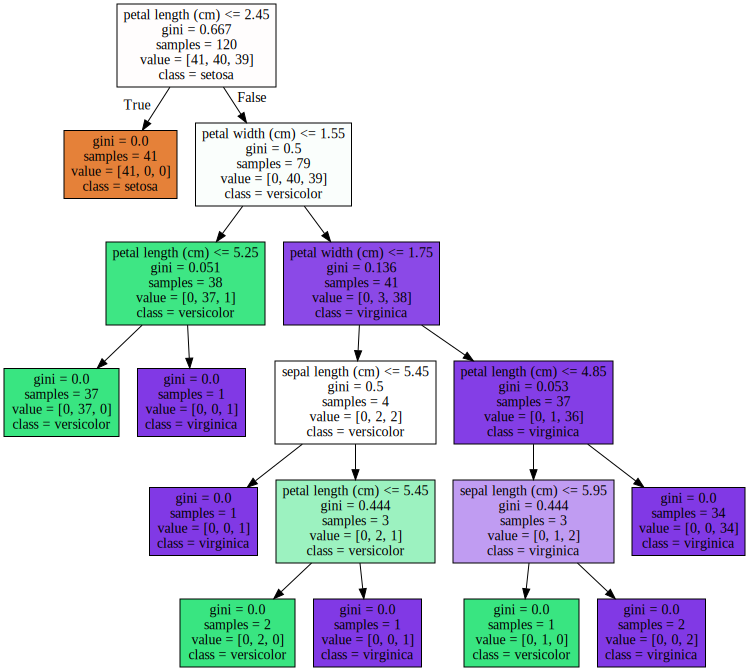

In [7]:
import graphviz

# Viaualize decision tree
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

Feature Importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


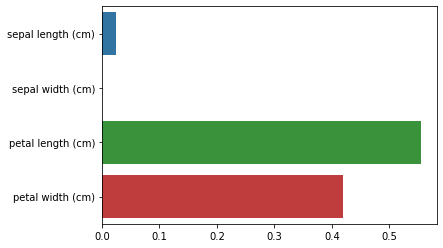

In [8]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance (.feature_importances_)
print("Feature Importances:\n{}".format(np.round(dt_clf.feature_importances_, 3)))

# Mapping
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))    
    
# Visualize
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)


In [9]:
## Visualize fitting (ex:overfitting)

#import
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

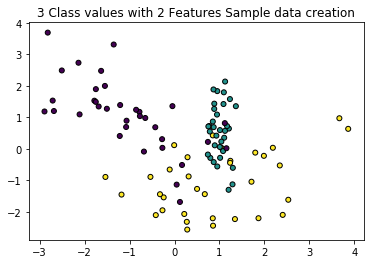

In [10]:
plt.title("3 Class values with 2 Features Sample data creation")

X_features, y_labels = make_classification(n_features = 2, n_redundant = 0, n_informative = 2, 
                                           n_classes = 3, n_clusters_per_class = 1, random_state = 0)

plt.scatter(X_features[:,0], X_features[:,1], marker ='o', c = y_labels, s = 25, edgecolor='k')

In [11]:
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)


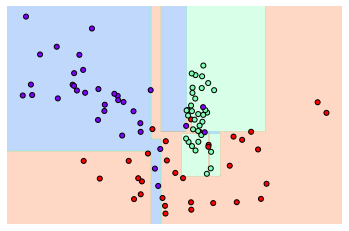

In [13]:
# Classifier's Decision Boundary function (From example code on book)
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # training data scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # training data using a model 
    model.fit(X, y)
    # meshgrid 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # visualization
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)
    
visualize_boundary(dt_clf, X_features, y_labels)

## Result: Overfitting

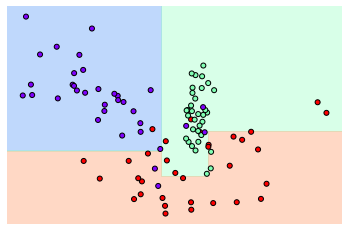

In [14]:
# with min_samples_leaf=6
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)

visualize_boundary(dt_clf, X_features, y_labels)